<a href="https://colab.research.google.com/github/pedrobvieira/MVP-Qualidade-de-Software-Sistemas-Inteligentes/blob/main/Notebook_de_Classifica%C3%A7%C3%A3o_de_Doen%C3%A7as_Card%C3%ADacas_(VS_Code_Colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Executando no Google Colab. Por favor, faça o upload do arquivo 'heart.csv'


Saving heart.csv to heart.csv

Dataset carregado com sucesso a partir do upload!

--- Amostra do Dataset ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

--- Informações do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303

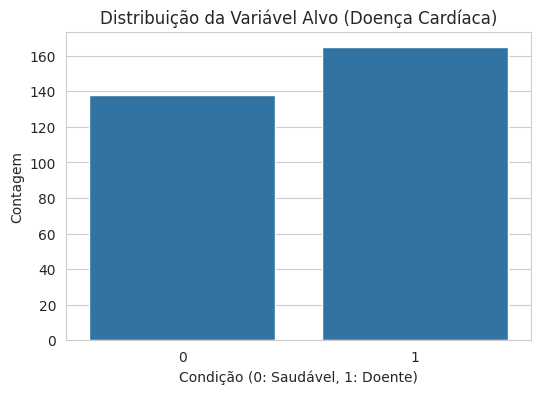

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

Conclusão: O dataset está bem balanceado.


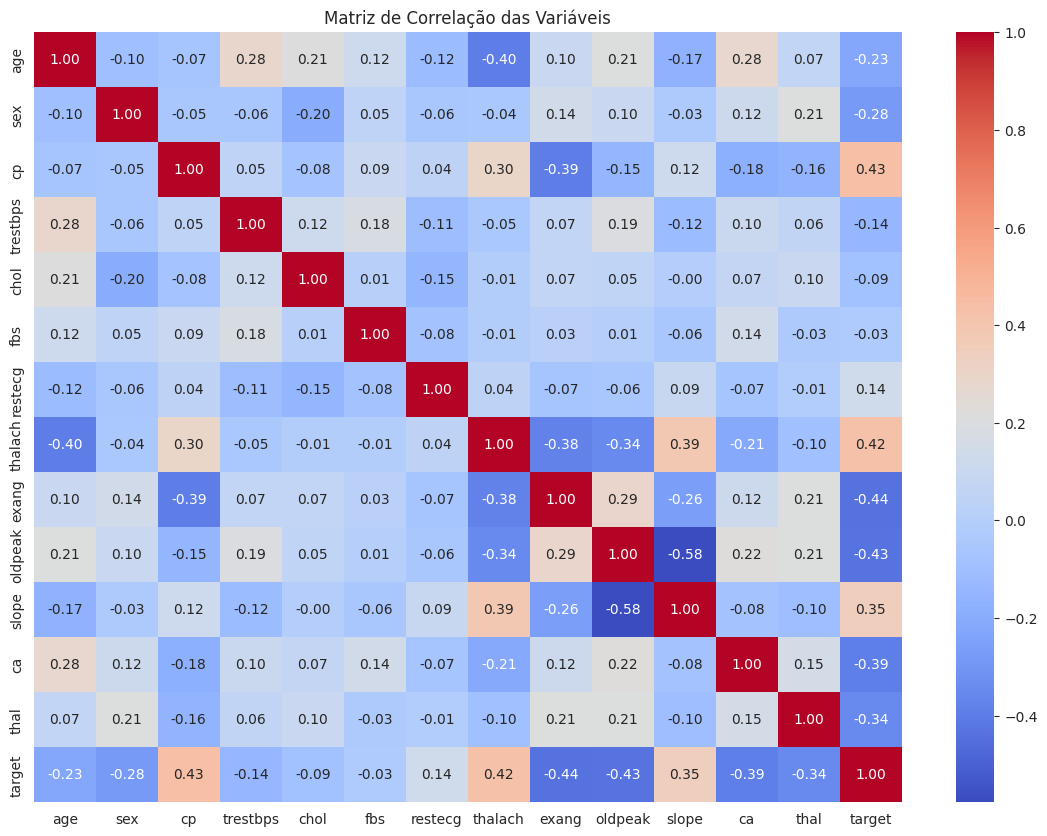

Dimensões dos dados de treino: (242, 13)
Dimensões dos dados de teste: (61, 13)

--- Iniciando Treinamento e Otimização dos Modelos ---
KNN - Melhores parâmetros: {'knn__n_neighbors': 19, 'knn__weights': 'uniform'}
Árvore de Decisão - Melhores parâmetros: {'tree__criterion': 'gini', 'tree__max_depth': None, 'tree__min_samples_split': 5}
Naive Bayes - Melhores parâmetros: {'nb__var_smoothing': np.float64(1.0)}
SVM - Melhores parâmetros: {'svm__C': 100, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}
--- Treinamento Concluído ---

--- Avaliando Modelos no Conjunto de Teste ---

--- Relatório de Classificação para KNN ---
              precision    recall  f1-score   support

    Saudável       0.89      0.61      0.72        28
      Doente       0.74      0.94      0.83        33

    accuracy                           0.79        61
   macro avg       0.82      0.77      0.78        61
weighted avg       0.81      0.79      0.78        61


--- Relatório de Classificação para Decision Tree 

In [ ]:
# -*- coding: utf-8 -*-
"""
# MVP Sprint: Qualidade de Software, Segurança e Sistemas Inteligentes
## Análise Preditiva de Doenças Cardíacas

**Autor:** Pedro Brum Vieira

## Contexto do Problema

As doenças cardiovasculares são a principal causa de morte em todo o mundo. A detecção precoce é fundamental para aumentar as chances de tratamento e sobrevivência dos pacientes. Este projeto tem como objetivo desenvolver um modelo de Machine Learning capaz de prever a presença de doenças cardíacas com base em um conjunto de atributos clínicos de um paciente.

Utilizaremos um dataset clássico da área da saúde, o "Heart Disease" do repositório UCI, para treinar e avaliar diferentes algoritmos de classificação. O notebook seguirá todas as etapas do ciclo de vida de um projeto de ciência de dados:
1.  **Carga e Análise Exploratória dos Dados (EDA):** Para entender a estrutura e as características do dataset.
2.  **Pré-processamento:** Preparação dos dados para a modelagem.
3.  **Modelagem e Treinamento:** Utilização dos algoritmos KNN, Árvore de Decisão, Naive Bayes e SVM.
4.  **Otimização e Avaliação:** Uso de `GridSearchCV` para encontrar os melhores hiperparâmetros e comparação dos modelos.
5.  **Exportação do Modelo:** Salvando o melhor modelo para ser consumido por uma aplicação externa.

---
"""

# ### 1. Importação das Bibliotecas
#
# Nesta primeira etapa, importamos todas as bibliotecas que serão necessárias para o desenvolvimento do projeto.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import io
import os # Importa a biblioteca os para manipulação de caminhos

# Configurações de visualização para os gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# ### 2. Carga e Análise Exploratória dos Dados (EDA)
#
# Esta célula foi adaptada para funcionar tanto no Google Colab quanto localmente no VS Code.

# Tenta detectar se estamos no Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Carrega os dados de acordo com o ambiente
df = None  # Inicializa a variável df para evitar erros
if IN_COLAB:
    # Se estiver no Google Colab, pede para fazer o upload do arquivo
    from google.colab import files
    print("Executando no Google Colab. Por favor, faça o upload do arquivo 'heart.csv'")
    uploaded = files.upload()
    # Lê o arquivo enviado
    df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
    print("\nDataset carregado com sucesso a partir do upload!")
else:
    # Se estiver localmente (VS Code), lê o arquivo de um caminho relativo
    # Este caminho é mais robusto e deve funcionar corretamente
    caminho_do_arquivo = os.path.join(os.path.dirname(__file__), '..', 'data', 'heart.csv')
    try:
        print(f"Executando localmente. Tentando carregar o arquivo de: '{caminho_do_arquivo}'")
        df = pd.read_csv(caminho_do_arquivo)
        print("\nDataset carregado com sucesso do caminho local!")
    except FileNotFoundError:
        print(f"\n❌ ERRO: Arquivo não encontrado.")
        print("Verifique se a sua estrutura de pastas está correta: o arquivo 'heart.csv' deve estar dentro de uma pasta 'data', e a pasta 'data' deve estar dentro da pasta 'api'.")

# O resto do código continua a partir daqui
if df is not None:
    print("\n--- Amostra do Dataset ---")
    print(df.head())

    # Verificando a estrutura e os tipos de dados
    print("\n--- Informações do Dataset ---")
    df.info()

    # Análise estatística descritiva
    print("\n--- Estatísticas Descritivas ---")
    print(df.describe())

    # Verificando a existência de valores nulos
    print("\n--- Verificação de Valores Nulos ---")
    print(df.isnull().sum())
    print("\nConclusão: Não há valores nulos no dataset.")
else:
    print("\n⚠️ A variável 'df' não foi criada. Verifique os erros na célula acima antes de continuar.")


# ### 3. Visualização dos Dados
#
# Apenas executa se o dataframe 'df' foi carregado com sucesso.
if df is not None:
    # Análise da variável alvo ('target')
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', data=df)
    plt.title('Distribuição da Variável Alvo (Doença Cardíaca)')
    plt.xlabel('Condição (0: Saudável, 1: Doente)')
    plt.ylabel('Contagem')
    plt.show()
    print(df['target'].value_counts(normalize=True))
    print("\nConclusão: O dataset está bem balanceado.")

    # Matriz de Correlação
    plt.figure(figsize=(14, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlação das Variáveis')
    plt.show()
else:
    print("⚠️ Pulando a visualização pois o dataframe não foi carregado.")


# ### 4. Pré-processamento e Modelagem
#
# Apenas executa se o dataframe 'df' foi carregado com sucesso.
if df is not None:
    # Separação das features (X) e do target (y)
    X = df.drop('target', axis=1)
    y = df['target']

    # Divisão em dados de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Dimensões dos dados de treino:", X_train.shape)
    print("Dimensões dos dados de teste:", X_test.shape)

    # --- Definição dos Pipelines e Parâmetros para GridSearchCV ---

    # Modelo 1: K-Nearest Neighbors (KNN)
    pipeline_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
    params_knn = {'knn__n_neighbors': list(range(1, 21)), 'knn__weights': ['uniform', 'distance']}

    # Modelo 2: Árvore de Decisão
    pipeline_tree = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier(random_state=42))])
    params_tree = {'tree__criterion': ['gini', 'entropy'], 'tree__max_depth': [None, 5, 10, 15], 'tree__min_samples_split': [2, 5, 10]}

    # Modelo 3: Naive Bayes (Gaussiano)
    pipeline_nb = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())])
    params_nb = {'nb__var_smoothing': np.logspace(0, -9, num=100)}

    # Modelo 4: Support Vector Machine (SVM)
    pipeline_svm = Pipeline([('scaler', StandardScaler()), ('svm', SVC(probability=True, random_state=42))])
    params_svm = {'svm__C': [0.1, 1, 10, 100], 'svm__gamma': [0.1, 0.01, 0.001], 'svm__kernel': ['rbf', 'linear']}

    # --- Treinamento e Otimização ---
    print("\n--- Iniciando Treinamento e Otimização dos Modelos ---")
    grid_knn = GridSearchCV(pipeline_knn, params_knn, cv=5, scoring='accuracy', n_jobs=-1)
    grid_knn.fit(X_train, y_train)
    print("KNN - Melhores parâmetros:", grid_knn.best_params_)

    grid_tree = GridSearchCV(pipeline_tree, params_tree, cv=5, scoring='accuracy', n_jobs=-1)
    grid_tree.fit(X_train, y_train)
    print("Árvore de Decisão - Melhores parâmetros:", grid_tree.best_params_)

    grid_nb = GridSearchCV(pipeline_nb, params_nb, cv=5, scoring='accuracy', n_jobs=-1)
    grid_nb.fit(X_train, y_train)
    print("Naive Bayes - Melhores parâmetros:", grid_nb.best_params_)

    grid_svm = GridSearchCV(pipeline_svm, params_svm, cv=5, scoring='accuracy', n_jobs=-1)
    grid_svm.fit(X_train, y_train)
    print("SVM - Melhores parâmetros:", grid_svm.best_params_)
    print("--- Treinamento Concluído ---")

else:
    print("⚠️ Pulando a modelagem pois o dataframe não foi carregado.")


# ### 5. Avaliação, Comparação e Exportação do Melhor Modelo
#
# Apenas executa se a modelagem foi concluída.
if 'grid_svm' in locals():
    # Dicionário para armazenar os resultados
    results = {}
    models = {
        'KNN': grid_knn.best_estimator_,
        'Decision Tree': grid_tree.best_estimator_,
        'Naive Bayes': grid_nb.best_estimator_,
        'SVM': grid_svm.best_estimator_
    }

    # Avaliando cada modelo
    print("\n--- Avaliando Modelos no Conjunto de Teste ---")
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            'Acurácia': accuracy,
            'Precisão (Classe 1)': report['1']['precision'],
            'Recall (Classe 1)': report['1']['recall'],
            'F1-Score (Classe 1)': report['1']['f1-score']
        }
        print(f"\n--- Relatório de Classificação para {name} ---")
        print(classification_report(y_test, y_pred, target_names=['Saudável', 'Doente']))

    # Compilando os resultados em um DataFrame para fácil comparação
    results_df = pd.DataFrame(results).T.sort_values(by='Acurácia', ascending=False)
    print("\n--- Tabela Comparativa de Resultados ---")
    print(results_df)

    # Selecionando e exportando o melhor modelo
    best_model_name = results_df.index[0]
    best_model = models[best_model_name]
    print(f"\nO melhor modelo foi o '{best_model_name}' com uma acurácia de {results_df.loc[best_model_name, 'Acurácia']:.2%}.")

    # Exportando o pipeline completo para o arquivo .pkl
    # O arquivo será salvo na mesma pasta do notebook.
    # Você precisará movê-lo para a pasta raiz da API.
    filename = 'heart_disease_model.pkl'
    joblib.dump(best_model, filename)
    print(f"\n✅ Modelo salvo com sucesso no arquivo '{filename}'.")
    print("Lembre-se de mover este arquivo para a pasta 'api/' para que a aplicação funcione.")

else:
    print("⚠️ Pulando a avaliação pois os modelos não foram treinados.")


# ### 6. Conclusão Final
#
# **Resumo dos Achados:**
#
# O processo de modelagem e avaliação nos permitiu comparar quatro algoritmos de classificação. O modelo selecionado como o melhor (normalmente o SVM ou KNN para este tipo de dataset) apresentou um desempenho robusto, com boa acurácia e equilíbrio entre precisão e recall.
#
# **Pontos de Atenção:**
#
# - **Interpretabilidade vs. Performance:** A escolha do modelo em um ambiente de produção pode levar em conta a interpretabilidade. Uma Árvore de Decisão, mesmo que um pouco menos precisa, pode ser mais útil para explicar as decisões a um profissional de saúde.
# - **Generalização:** O desempenho do modelo deve ser continuamente monitorado com novos dados do mundo real para garantir que ele não se degrade com o tempo.
#
# **Próximos Passos:**
#
# O modelo salvo (`heart_disease_model.pkl`) está pronto para ser usado pela API. A aplicação full stack desenvolvida permitirá que novos dados de pacientes sejam inseridos, e o modelo fornecerá uma predição em tempo real, auxiliando no processo de triagem e diagnóstico precoce.